# I. EDA и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# импорты функций
from src.config import PATH, PROCESSED_DATA_PATH
from src.preprocessing import fill_median, fill_special, limit_outliers, clean_age, process_debt_ratio

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.precision', 5)

In [4]:
df = pd.read_csv(PATH, index_col=0)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.76613,45,2,0.80298,9120.0,13,0,6,0,2.0
2,0,0.95715,40,0,0.12188,2600.0,4,0,0,0,1.0
3,0,0.65818,38,1,0.08511,3042.0,2,1,0,0,0.0
4,0,0.23381,30,0,0.03605,3300.0,5,0,0,0,0.0
5,0,0.90724,49,1,0.02493,63588.0,7,0,1,0,0.0


**Расшифровка (интерпретация) названий признаков:**

1. _SeriousDlqin2yrs_ - лицо, совершившее просрочку платежа на 90 дней или больше (target).
2. _RevolvingUtilizationOfUnsecuredLines_ - общий остаток средств на кредитных картах и личных кредитных линиях, за исключением операций с недвижимостью и без рассрочки платежа.
3. _age_ - возраст.
4. _NumberOfTime30-59DaysPastDueNotWorse_ - количество случаев, когда заемщик просрочивал платеж на 30-59 дней, но за последние 2 года ситуация не ухудшилась.
5. _DebtRatio_ - ежемесячные выплаты по долгам, алиментам, расходы на проживание, разделенные на ежемесячный валовой доход.
6. _MonthlyIncome_ - ежемесячный доход.
7. _NumberOfOpenCreditLinesAndLoans_ - количество открытых кредитов (например, автокредит в рассрочку или ипотека) и кредитных линий (например, кредитные карты).
8. _NumberOfTimes90DaysLate_ - количество случаев, когда заемщик просрочивал платеж на 90 дней или более.
9. _NumberRealEstateLoansOrLines_ - количество ипотечных кредитов и займов на недвижимость, включая кредитные линии на приобретение жилья.
10. _NumberOfTime60-89DaysPastDueNotWorse_ - количество случаев, когда заемщик просрочивал платеж на 60-89 дней, но за последние 2 года ситуация не ухудшилась.
11. _NumberOfDependents_ - количество иждивенцев в семье, не считая их самих (супруг(а), дети и т.д.).

In [5]:
print(f"Размер исходных данных: {df.shape}")

Размер исходных данных: (150000, 11)


In [6]:
print(f"Типы данных:\n{df.dtypes}")

Типы данных:
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


Все признаки числовые, категориальных признаков нет.

---

In [7]:
# занимаемое место (в МБ)
df.memory_usage(deep=True) / (2 ** 20)

Index                                   1.14441
SeriousDlqin2yrs                        1.14441
RevolvingUtilizationOfUnsecuredLines    1.14441
age                                     1.14441
NumberOfTime30-59DaysPastDueNotWorse    1.14441
DebtRatio                               1.14441
MonthlyIncome                           1.14441
NumberOfOpenCreditLinesAndLoans         1.14441
NumberOfTimes90DaysLate                 1.14441
NumberRealEstateLoansOrLines            1.14441
NumberOfTime60-89DaysPastDueNotWorse    1.14441
NumberOfDependents                      1.14441
dtype: float64

In [8]:
# информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtypes: fl

In [9]:
# распределение числовых признаков
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,150000.0,0.06684,0.24975,0.0,0.00000,0.00000,0.00000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,6.04844,249.75537,0.0,0.02987,0.15418,0.55905,50708.0
age,150000.0,52.29521,14.77187,0.0,41.00000,52.00000,63.00000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.42103,4.19278,0.0,0.00000,0.00000,0.00000,98.0
DebtRatio,150000.0,353.00508,2037.81852,0.0,0.17507,0.36651,0.86825,329664.0
MonthlyIncome,120269.0,6670.22124,14384.67422,0.0,3400.00000,5400.00000,8249.00000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.45276,5.14595,0.0,5.00000,8.00000,11.00000,58.0
NumberOfTimes90DaysLate,150000.0,0.26597,4.16930,0.0,0.00000,0.00000,0.00000,98.0
NumberRealEstateLoansOrLines,150000.0,1.01824,1.12977,0.0,0.00000,1.00000,2.00000,54.0
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.24039,4.15518,0.0,0.00000,0.00000,0.00000,98.0


Уже можно увидеть, что есть пропуски: count `MonthlyIncome` = 120269, count `NumberOfDependents` = 146076.

In [10]:
missing = df.isna().sum().sort_values(ascending=False)

In [11]:
percent = (missing / len(df)) * 100
pd.DataFrame({'missing_percent': percent}).style.format('{:.3f}%')

,missing_percent
MonthlyIncome,19.821%
NumberOfDependents,2.616%
SeriousDlqin2yrs,0.000%
age,0.000%
RevolvingUtilizationOfUnsecuredLines,0.000%
DebtRatio,0.000%
NumberOfTime30-59DaysPastDueNotWorse,0.000%
NumberOfOpenCreditLinesAndLoans,0.000%
NumberOfTimes90DaysLate,0.000%
NumberRealEstateLoansOrLines,0.000%


Далее в этом ноутбуке пропуски будут заполнены специальным значением (-1) для бустинга (чтобы модель видела, что это пропущенное значение), и медианой для логистической регрессии.

In [12]:
# уникальные значения
df.nunique()

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13594
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          13
dtype: int64

---

### Анализ целевой переменной

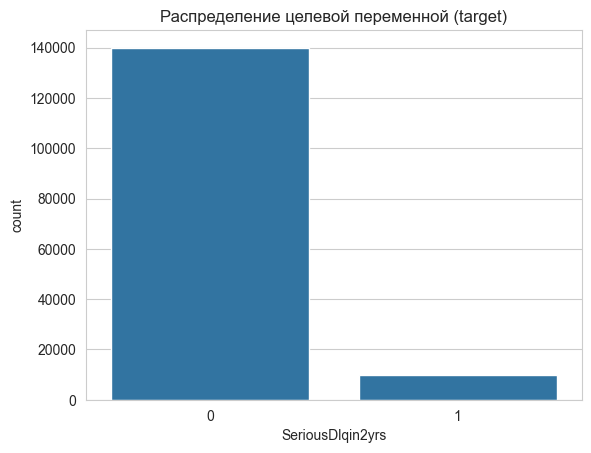

Доля дефолтов (target = 1): 0.06684


In [13]:
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Распределение целевой переменной (target)')
plt.show()

print(f"Доля дефолтов (target = 1): {df[df['SeriousDlqin2yrs'] == 1].shape[0] / len(df)}")

Наблюдается сильный дисбаланс классов. Доля дефолтов составляет 6,7%.

Для корректной оценки моделей будем использовать stratifed k-fold и метрику ROC-AUC.

---

### Анализ выбросов

In [14]:
# распределение возраста
df['age'].describe()

count    150000.00000
mean         52.29521
std          14.77187
min           0.00000
25%          41.00000
50%          52.00000
75%          63.00000
max         109.00000
Name: age, dtype: float64

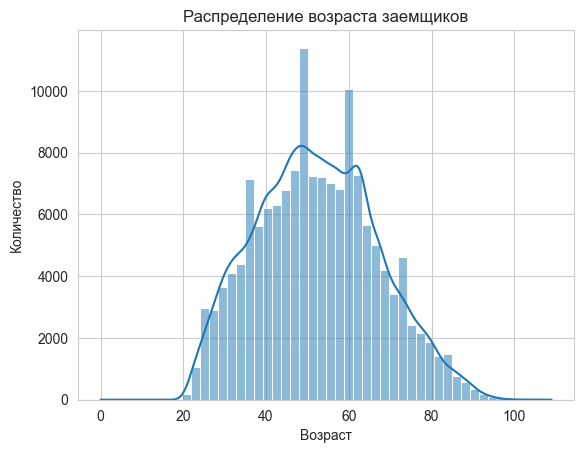

In [15]:
sns.histplot(df['age'], bins=50, kde=True)
plt.title('Распределение возраста заемщиков')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

Обнаружены подозрительные значения возраста (`min` = 0 и `max` = 109, похожие на выбросы).

Рассмотрим детальнее выбросы в возрасте.

In [16]:
age_less_18 = df.loc[df['age'] < 18]['age'].count()
age_more_90 = df.loc[df['age'] > 90]['age'].count()

print(f"Количество людей, возраст которых меньше 18: {age_less_18}\nКоличество людей, возраст которых больше 90 лет: {age_more_90}")

Количество людей, возраст которых меньше 18: 1
Количество людей, возраст которых больше 90 лет: 489


Ограничим возраст заемщиков вручную 90 годами как верхний бизнес-предел (все значения, что выше 90, заменим на это самое пограничное значение). Заменим одно нулевое значение возраста медианой.

In [17]:
# обработка возраста меньше 18 лет (один пропуск)
median_age = df['age'].median()
df.loc[df['age'] < 18, 'age'] = median_age

In [18]:
# обработка верхнего предела возраста
df = clean_age(df)

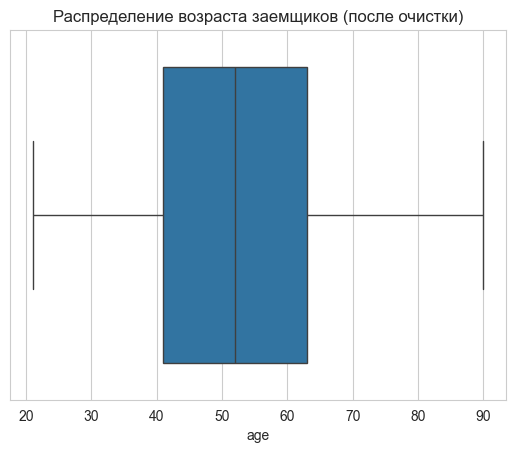

In [19]:
sns.boxplot(x=df['age'])
plt.title('Распределение возраста заемщиков (после очистки)')
plt.show()

---

Общий остаток средств `RevolvingUtilizationOfUnsecuredLines` и отношение расходов к доходам `DebtRatio` выражены в процентном соотношении. С помощью метода `describe` были обнаружены аномалии (экстремальные максимальные значения).

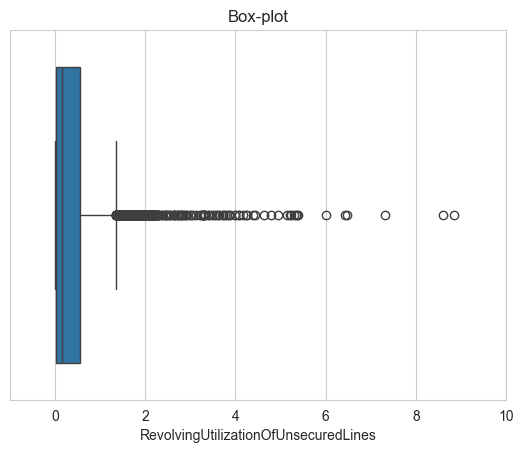

In [20]:
sns.boxplot(x = df['RevolvingUtilizationOfUnsecuredLines'])
plt.title('Box-plot')
plt.xlim(-1, 10)
plt.show()

Визуализация box-plot наглядно демонстрирует, что значения признака `RevolvingUtilizationOfUnsecuredLines` больше 1 "с хвостиком" являются выбросами (Q3 + 1.5 * IQR).

In [21]:
df.loc[df['RevolvingUtilizationOfUnsecuredLines'] > 1].shape[0]

3321

Выбросы этого признака по box-plot составляют чуть более 2%.

Обработаем пропуски следующим образом: определим верхний лимит как 99-й квантиль; все значения, превышающие 99-й квантиль, будут заменены на него.

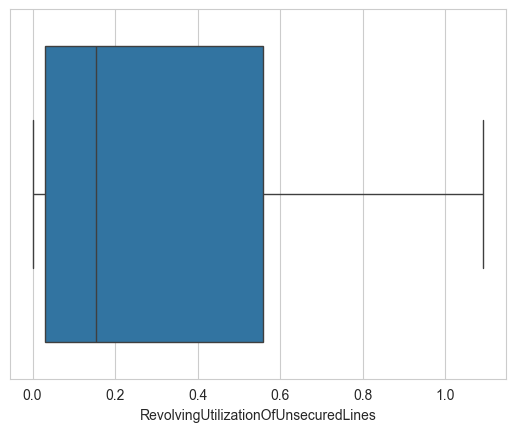

In [22]:
df = limit_outliers(
    df, ['RevolvingUtilizationOfUnsecuredLines']
)

sns.boxplot(x=df['RevolvingUtilizationOfUnsecuredLines'])
plt.show()

Рассмотрим признак `DebtRatio` - отношение всех ежемесячных расходов к ежемесячному доходу.

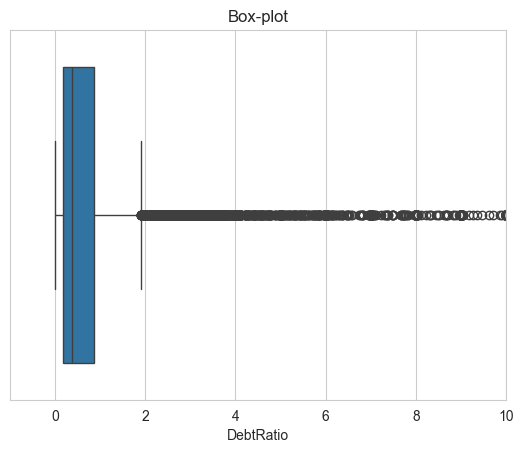

In [23]:
sns.boxplot(x = df['DebtRatio'])
plt.title('Box-plot')
plt.xlim(-1, 10)
plt.show()

В теории, общие расходы могут превышать доходы (высокая долговая нагрузка).

Однако проблема кроется в следующем: если доход равен нулю или отсутствует, но при этом есть платежи, то `DebtRatio` становится нереально большим.

Поэтому обработаем пропуски следующим образом:
- создадим бинарный признак (флаг) для обозначения экстремальных значений (> 50);
- все значения, превышающие фиксированное значение (50), заменим на это же пороговое значение.

In [24]:
df = process_debt_ratio(df)

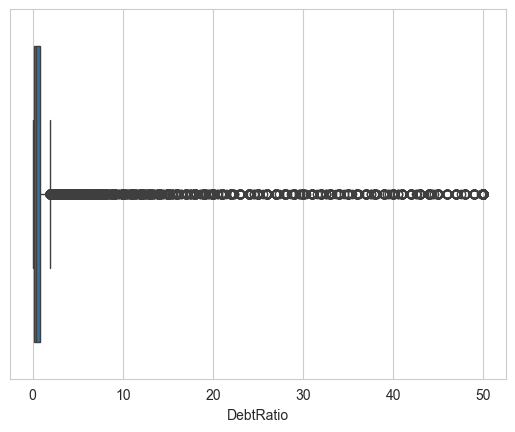

In [25]:
sns.boxplot(x=df['DebtRatio'])
plt.show()

In [26]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_Flag
1,1,0.76613,45,2,0.80298,9120.0,13,0,6,0,2.0,0
2,0,0.95715,40,0,0.12188,2600.0,4,0,0,0,1.0,0
3,0,0.65818,38,1,0.08511,3042.0,2,1,0,0,0.0,0
4,0,0.23381,30,0,0.03605,3300.0,5,0,0,0,0.0,0
5,0,0.90724,49,1,0.02493,63588.0,7,0,1,0,0.0,0


---

### Анализ взаимосвязи признаков

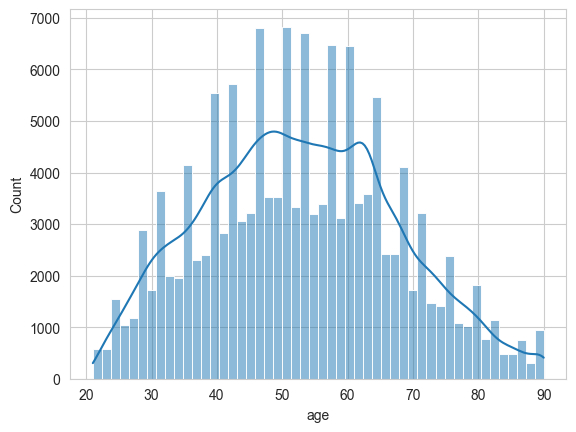

In [27]:
sns.histplot(df.loc[df['SeriousDlqin2yrs'] == 0]['age'], bins=50, kde=True)
plt.show()

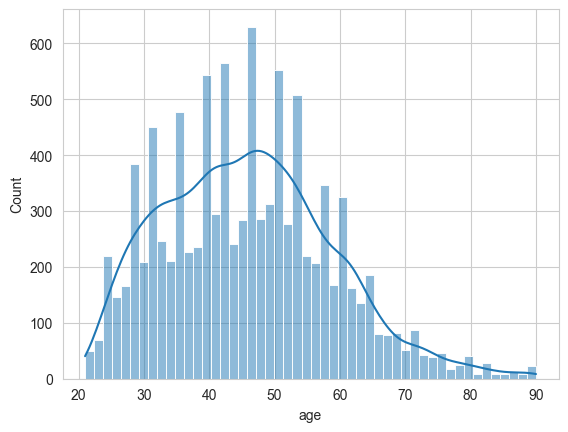

In [28]:
sns.histplot(df.loc[df['SeriousDlqin2yrs'] == 1]['age'], bins=50, kde=True)
plt.show()

In [29]:
age_df = df.groupby('SeriousDlqin2yrs')['age'].agg(['median', 'mean'])
age_df

,median,mean
SeriousDlqin2yrs,,
0,52.0,52.74102
1,45.0,45.92200


Стоит обратить внимание, что медианный и средний возраст у дефолтеров (заемщиков с просрочкой) часто ниже - распределение скошено вправо.

**Вывод:** молодые группы имеют самую высокую вероятность дефолта (PD), а старшие - самую низкую.

---

Рассмотрим корреляцию признаков.

In [30]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
num_cols

['SeriousDlqin2yrs',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'DebtRatio_Flag']

<Axes: >

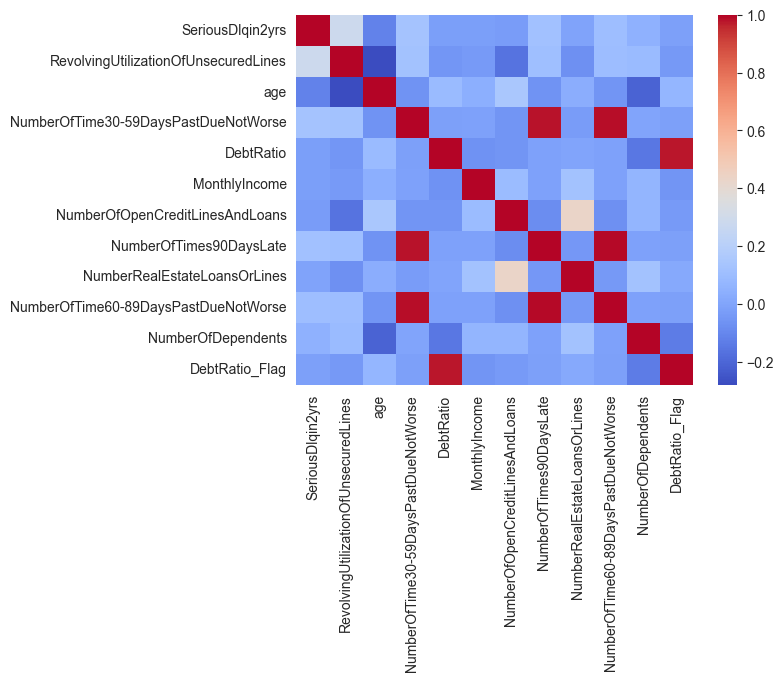

In [31]:
corr = df[num_cols].corr()

sns.heatmap(corr, cmap="coolwarm")

Как видно на графике, присутствует сильная корреляция между признаками (мультиколлинеарность) просрочек платежей. По сути, эти признаки измеряют одно и то же, различие лишь в периоде, когда был просрочен платеж.

Создадим агрегат и объединим эти признаки в один (сумма всех трех).

In [32]:
df['Total_Late_Payments'] = (
    df['NumberOfTime30-59DaysPastDueNotWorse'] +
    df['NumberOfTime60-89DaysPastDueNotWorse'] +
    df['NumberOfTimes90DaysLate']
)

---

### Препроцессинг и создание очищенных данных

Для обучения модели логистической регрессии обязательны данные без пропусков. Сделаем копию обработанного датасета, затем заполним медианной пропущенные значения в двух признаках, найденных раньше, и удалим признаки с мультиколлинеарностью (оставив только Total_Late_Payments).

In [33]:
df_logreg = df.copy()

# заполним медианой
df_logreg = fill_median(df_logreg)

# удалим признаки просрочек платежей, оставив только один
df_logreg = df_logreg.drop(
    ['NumberOfTime30-59DaysPastDueNotWorse',
     'NumberOfTime60-89DaysPastDueNotWorse',
     'NumberOfTimes90DaysLate'],
    axis=1)

df_logreg.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines,NumberOfDependents,DebtRatio_Flag,Total_Late_Payments
1,1,0.76613,45,0.80298,9120.0,13,6,2.0,0,2
2,0,0.95715,40,0.12188,2600.0,4,0,1.0,0,0
3,0,0.65818,38,0.08511,3042.0,2,0,0.0,0,2
4,0,0.23381,30,0.03605,3300.0,5,0,0.0,0,0
5,0,0.90724,49,0.02493,63588.0,7,1,0.0,0,1


In [34]:
# сохраним обработанные данные в parquet
df_logreg.to_parquet(
    PROCESSED_DATA_PATH + 'logreg_data.parquet',
    index=False,
    compression='snappy'
)

print("Данные успешно сохранены")

Данные успешно сохранены


Аналогично обработаем данные для модели градиентного бустинга, кроме удаления признаков.

In [35]:
df_boosting = df.copy()

# заполним специальным значением
df_boosting = fill_special(df_boosting)

df_boosting.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,DebtRatio_Flag,Total_Late_Payments
1,1,0.76613,45,2,0.80298,9120.0,13,0,6,0,2.0,0,2
2,0,0.95715,40,0,0.12188,2600.0,4,0,0,0,1.0,0,0
3,0,0.65818,38,1,0.08511,3042.0,2,1,0,0,0.0,0,2
4,0,0.23381,30,0,0.03605,3300.0,5,0,0,0,0.0,0,0
5,0,0.90724,49,1,0.02493,63588.0,7,0,1,0,0.0,0,1


In [36]:
# сохраним обработанные данные в parquet
df_boosting.to_parquet(
    PROCESSED_DATA_PATH + 'boosting_data.parquet',
    index=False,
    compression='snappy'
)

print("Данные успешно сохранены")

Данные успешно сохранены


---

### Вывод

На основе анализа данных:
- найден сильный дисбаланс целевой переменной;
- обработаны аномалии и выбросы (возраст, общий остаток и отношение расходов к доходам);
- обнаружена высокая мультиколлинеарность среди признаков просрочек платежей;
- создан агрегированный признак Total_Late_Payments (сумма всех просрочек), который будет использоваться вместо трех исходных признаков для снижения нестабильности модели логистической регрессии;
- сохранены очищенные датасеты для обучения моделей.